In [1]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('GlobalTerrorismDataset.csv', encoding='iso-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
print(list(data.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

As a security/defense analyst, try to find out the hot zone of terrorism.

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


- **Year**: The year in which the event occurred.
- **Month**: The month in which the event occurred.
- **Day**: The day on which the event occurred.
- **Country**: Text description of the country where the event occurred.
- **state**: The province or state where the event occurred.
- **Region**: Text description of the region where the event occurred.
- **city**: The city where the event occurred.
- **latitude**: Latitude coordinate of the event location.
- **longitude**: Longitude coordinate of the event location.
- **AttackType**: Text description of the primary attack type.
- **Killed**: Number of total fatalities.
- **Wounded**: Number of total wounded.
- **Target**: Name or description of the primary target.
- **Summary**: Summary description of the event.
- **Group**: Name of the perpetrator group.
- **Target_type**: Text description of the primary target type.
- **Weapon_type**: Text description of the primary weapon type.
- **Motive**: Description of the motive behind the attack (if known).

In [6]:
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
missing_values = {column: count for column, count in data.isna().sum().items()}
missing_values

{'Year': 0,
 'Month': 0,
 'Day': 0,
 'Country': 0,
 'state': 421,
 'Region': 0,
 'city': 435,
 'latitude': 4556,
 'longitude': 4557,
 'AttackType': 0,
 'Killed': 10313,
 'Wounded': 16311,
 'Target': 638,
 'Summary': 66129,
 'Group': 0,
 'Target_type': 0,
 'Weapon_type': 0,
 'Motive': 131130}

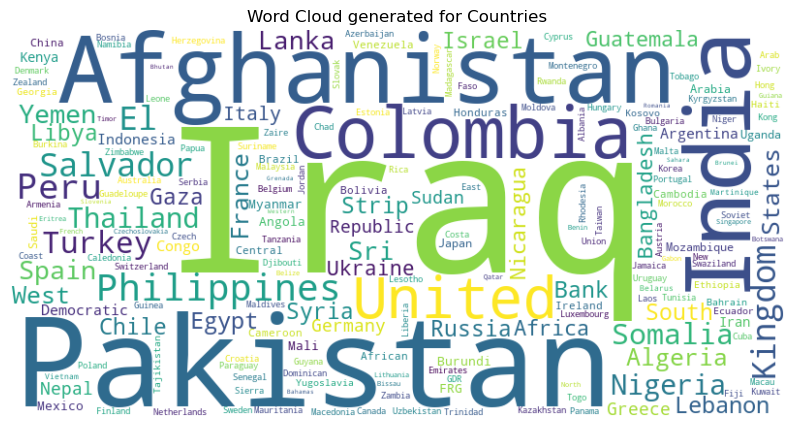

In [8]:
import wordcloud
text = ' '.join(data.Country.dropna(how = 'all'))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations = False).generate(text)

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud generated for Countries')
plt.show()

In [9]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [10]:
no_of_attacks_in_each_year = data['Year'].value_counts(dropna = False).sort_index()

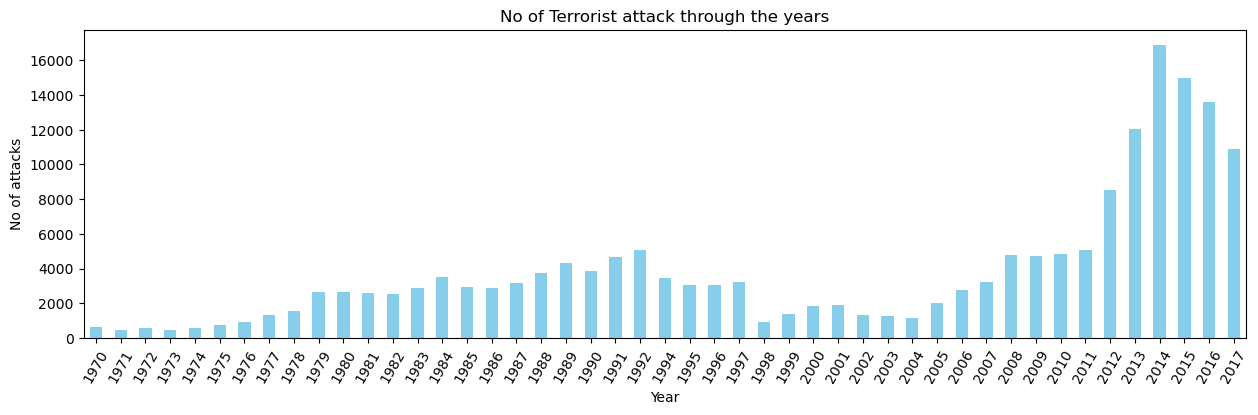

In [11]:
plt.figure(figsize=(15, 4))
no_of_attacks_in_each_year.plot(kind='bar', color='skyblue')
plt.title("No of Terrorist attack through the years")
plt.xlabel('Year')
plt.ylabel('No of attacks')
plt.xticks(rotation=60)
plt.show()

In [12]:
no_of_attacks_in_each_region = data['Region'].value_counts(dropna = False)

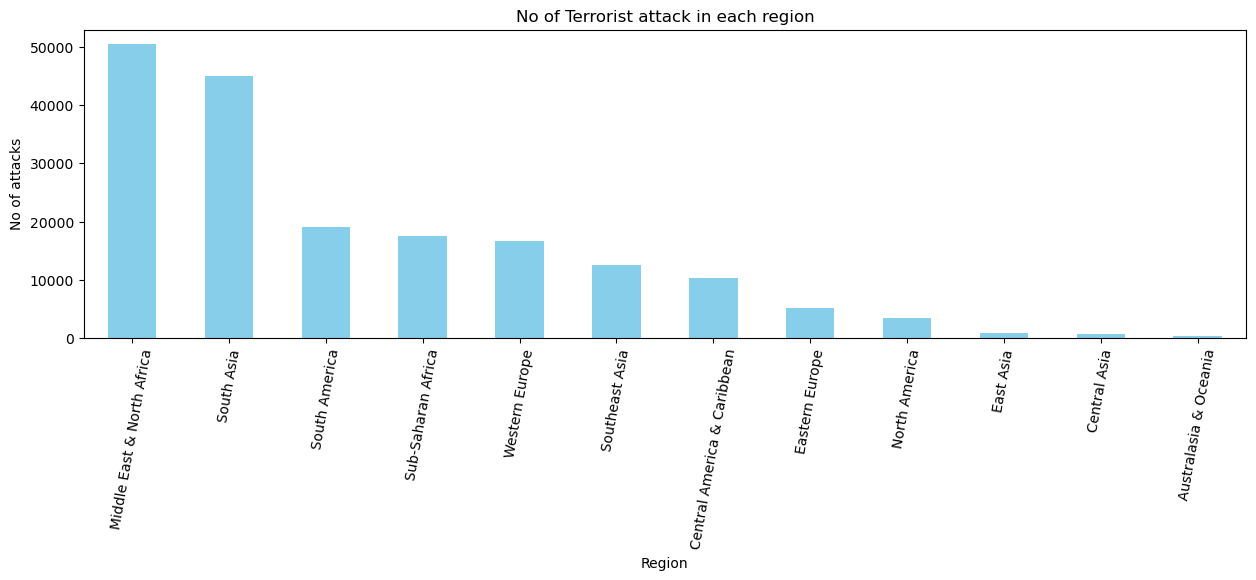

In [13]:
plt.figure(figsize=(15, 4))
no_of_attacks_in_each_region.plot(kind='bar', color='skyblue')

plt.title("No of Terrorist attack in each region")
plt.xlabel('Region')
plt.ylabel('No of attacks')
plt.xticks(rotation = 80)
plt.show()

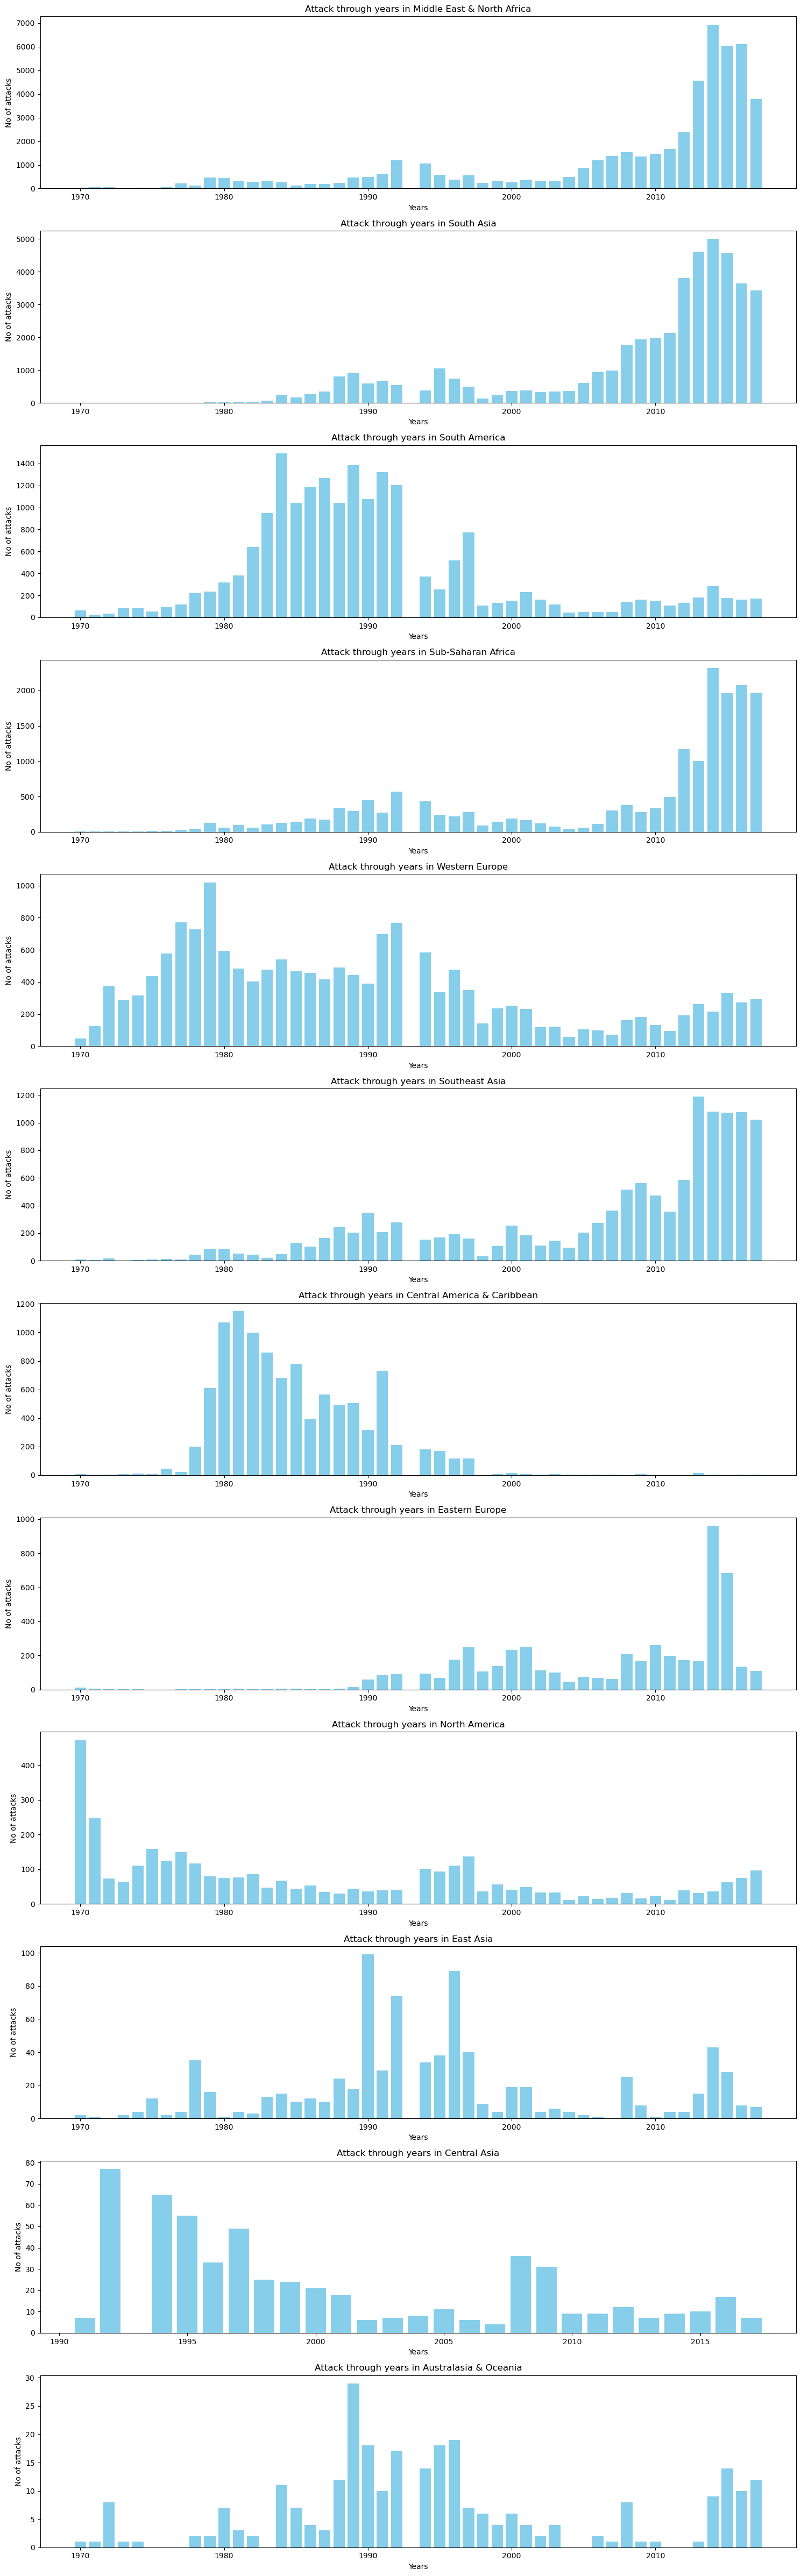

In [14]:
Region = data['Region'].value_counts().index

fig, axes = plt.subplots(nrows=len(Region), figsize=(15, 4*len(Region)))

# Subplot 1: barplot
for i,region in enumerate(Region):
    no_of_attack_in_each_region = data[data['Region']==region]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_region.index, no_of_attack_in_each_region.values, color='skyblue')
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {region}")
    


plt.tight_layout()
plt.show()

In [15]:
no_of_attacks_in_each_country = data['Country'].value_counts(dropna = False)

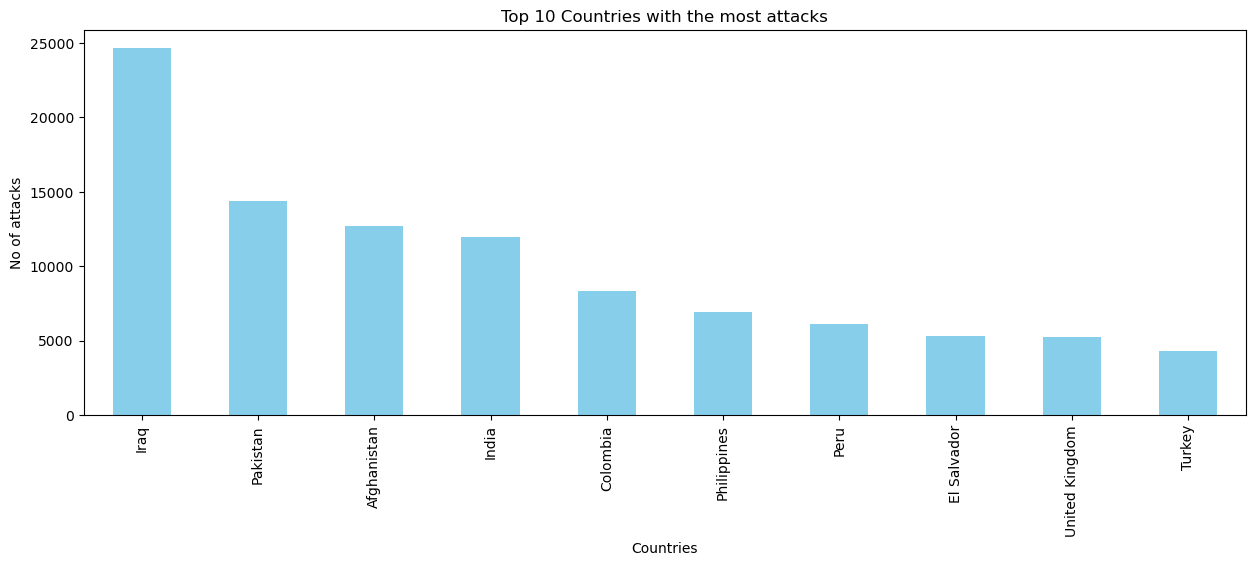

In [16]:
n = 10
top_n = no_of_attacks_in_each_country.head(n)
top_n_countries = top_n.index


plt.figure(figsize=(15, 5))
top_n.plot(kind='bar', color='skyblue')
plt.title(f'Top {n} Countries with the most attacks')
plt.xlabel('Countries')
plt.ylabel('No of attacks')
plt.xticks(rotation=90)
plt.show()


In [17]:
top_n_countries

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object', name='Country')

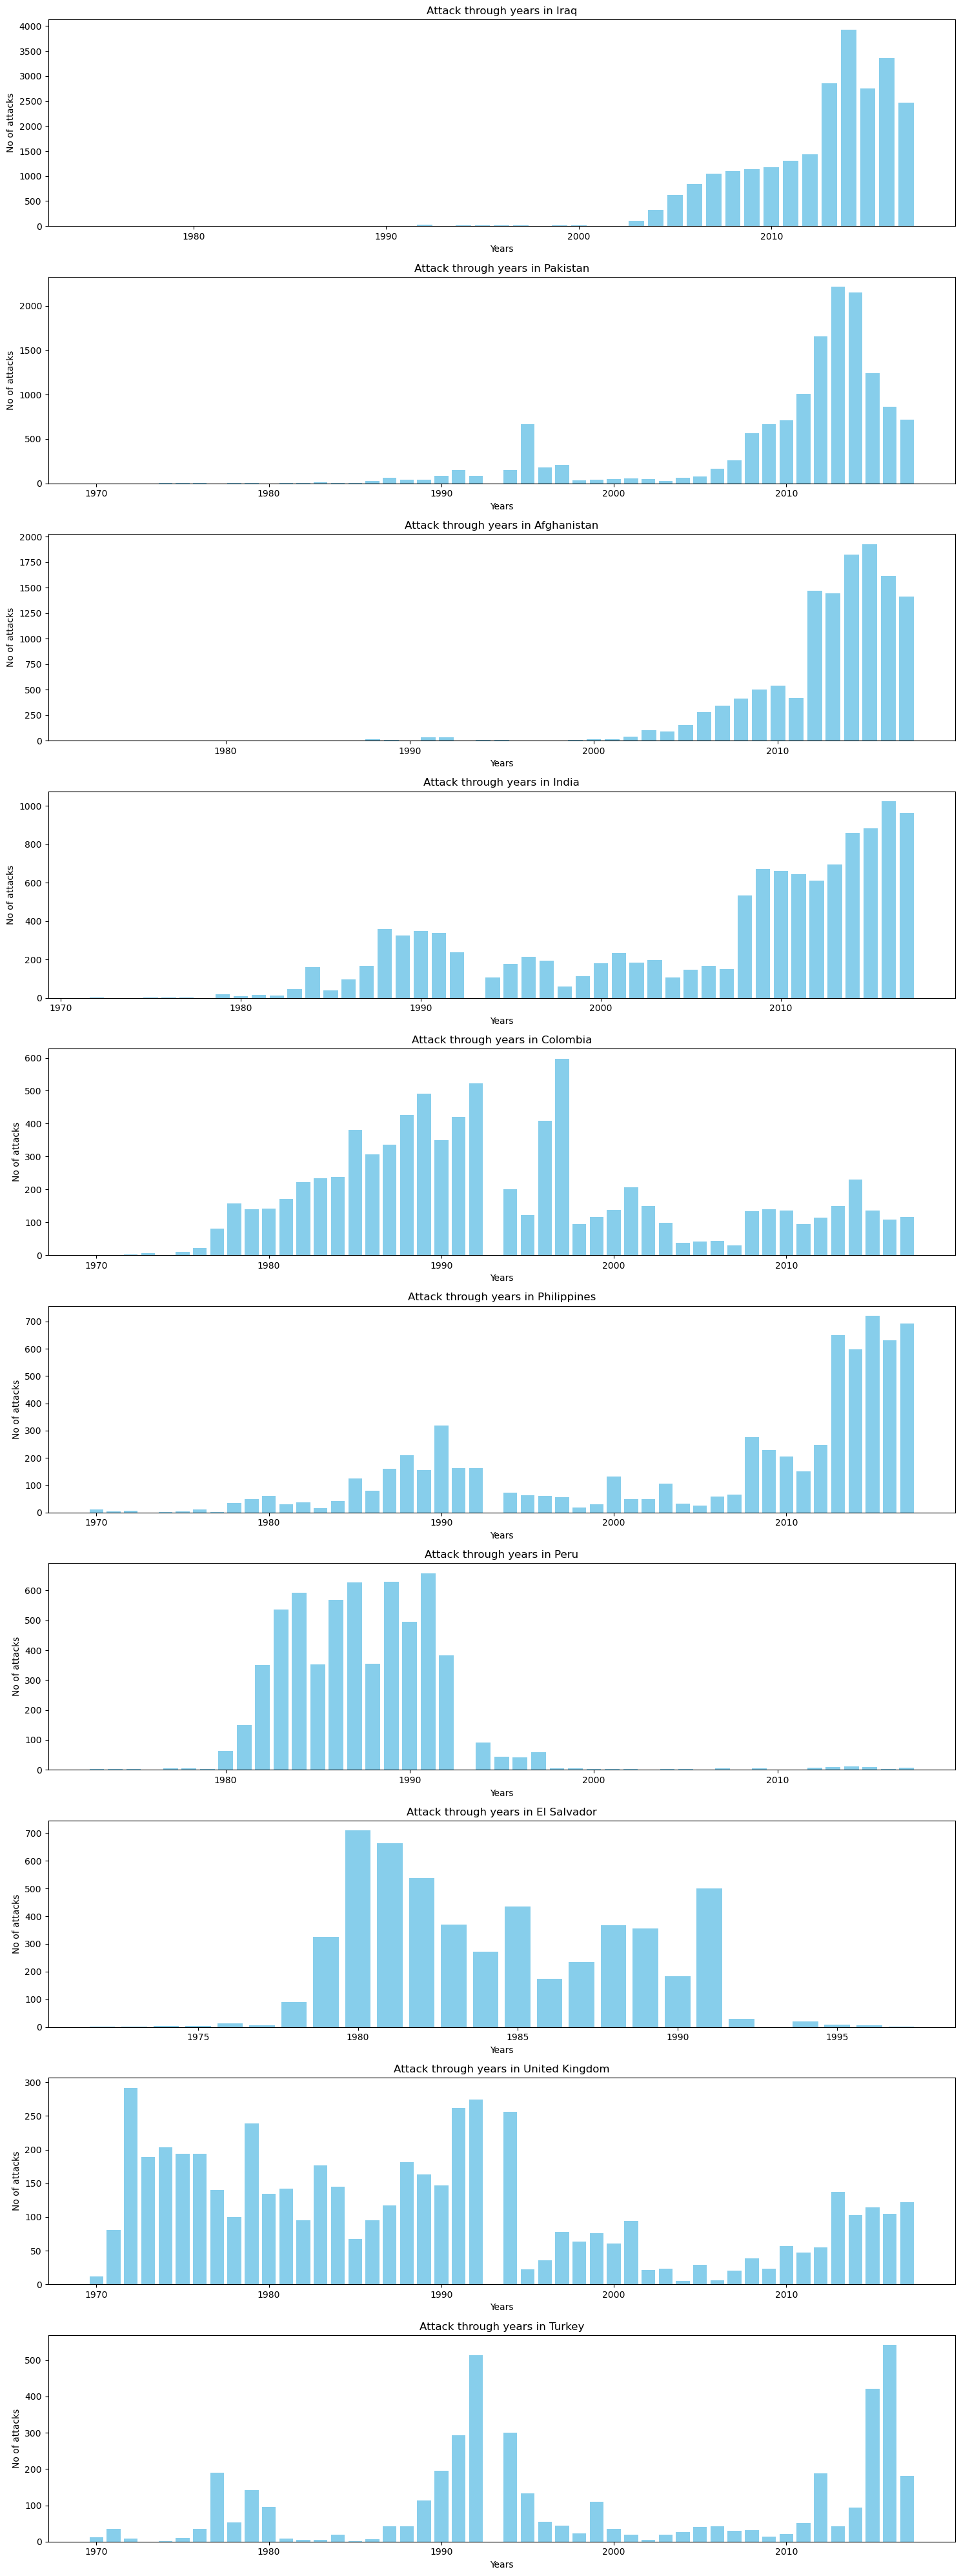

In [18]:
fig, axes = plt.subplots(nrows=len(top_n_countries), figsize=(15, 4*len(top_n_countries)))

# Subplot 1: barplot
for i,country in enumerate(top_n_countries):
    no_of_attack_in_each_country = data[data['Country']==country]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_country.index, no_of_attack_in_each_country.values, color='skyblue')
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {country}")
    


plt.tight_layout()
plt.show()

In [19]:
no_of_attacks_in_each_city = data[data['city']!='Unknown']['city'].value_counts()

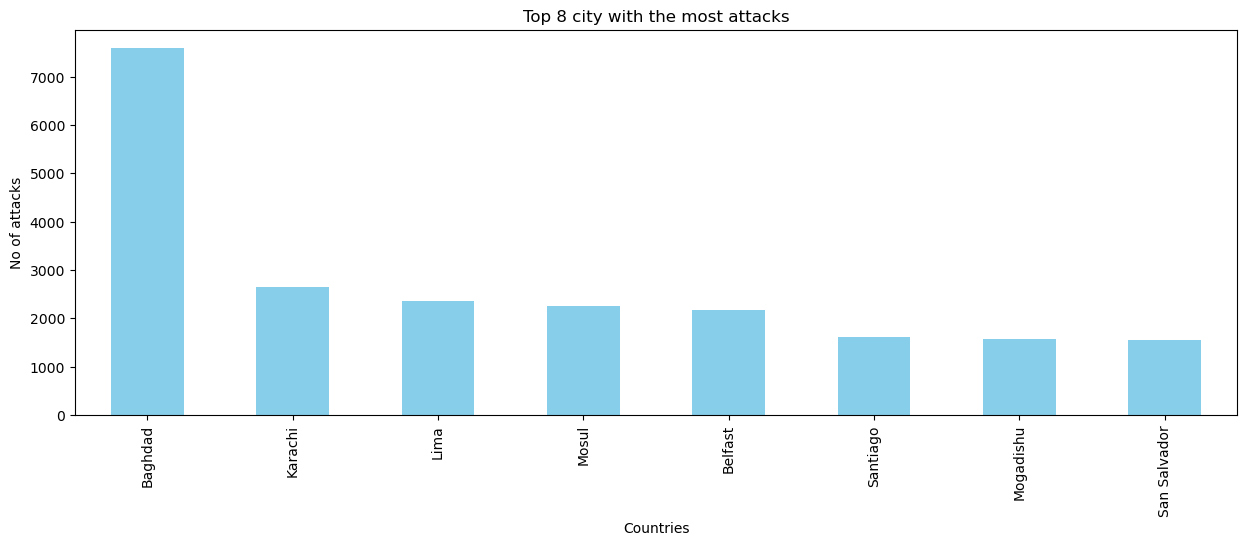

In [20]:
n = 8
top_n = no_of_attacks_in_each_city.head(n)
top_n_city = top_n.index


plt.figure(figsize=(15, 5))
top_n.plot(kind='bar', color='skyblue')
plt.title(f'Top {n} city with the most attacks')
plt.xlabel('Countries')
plt.ylabel('No of attacks')
plt.xticks(rotation=90)
plt.show()


In [21]:
top_n_city

Index(['Baghdad', 'Karachi', 'Lima', 'Mosul', 'Belfast', 'Santiago',
       'Mogadishu', 'San Salvador'],
      dtype='object', name='city')

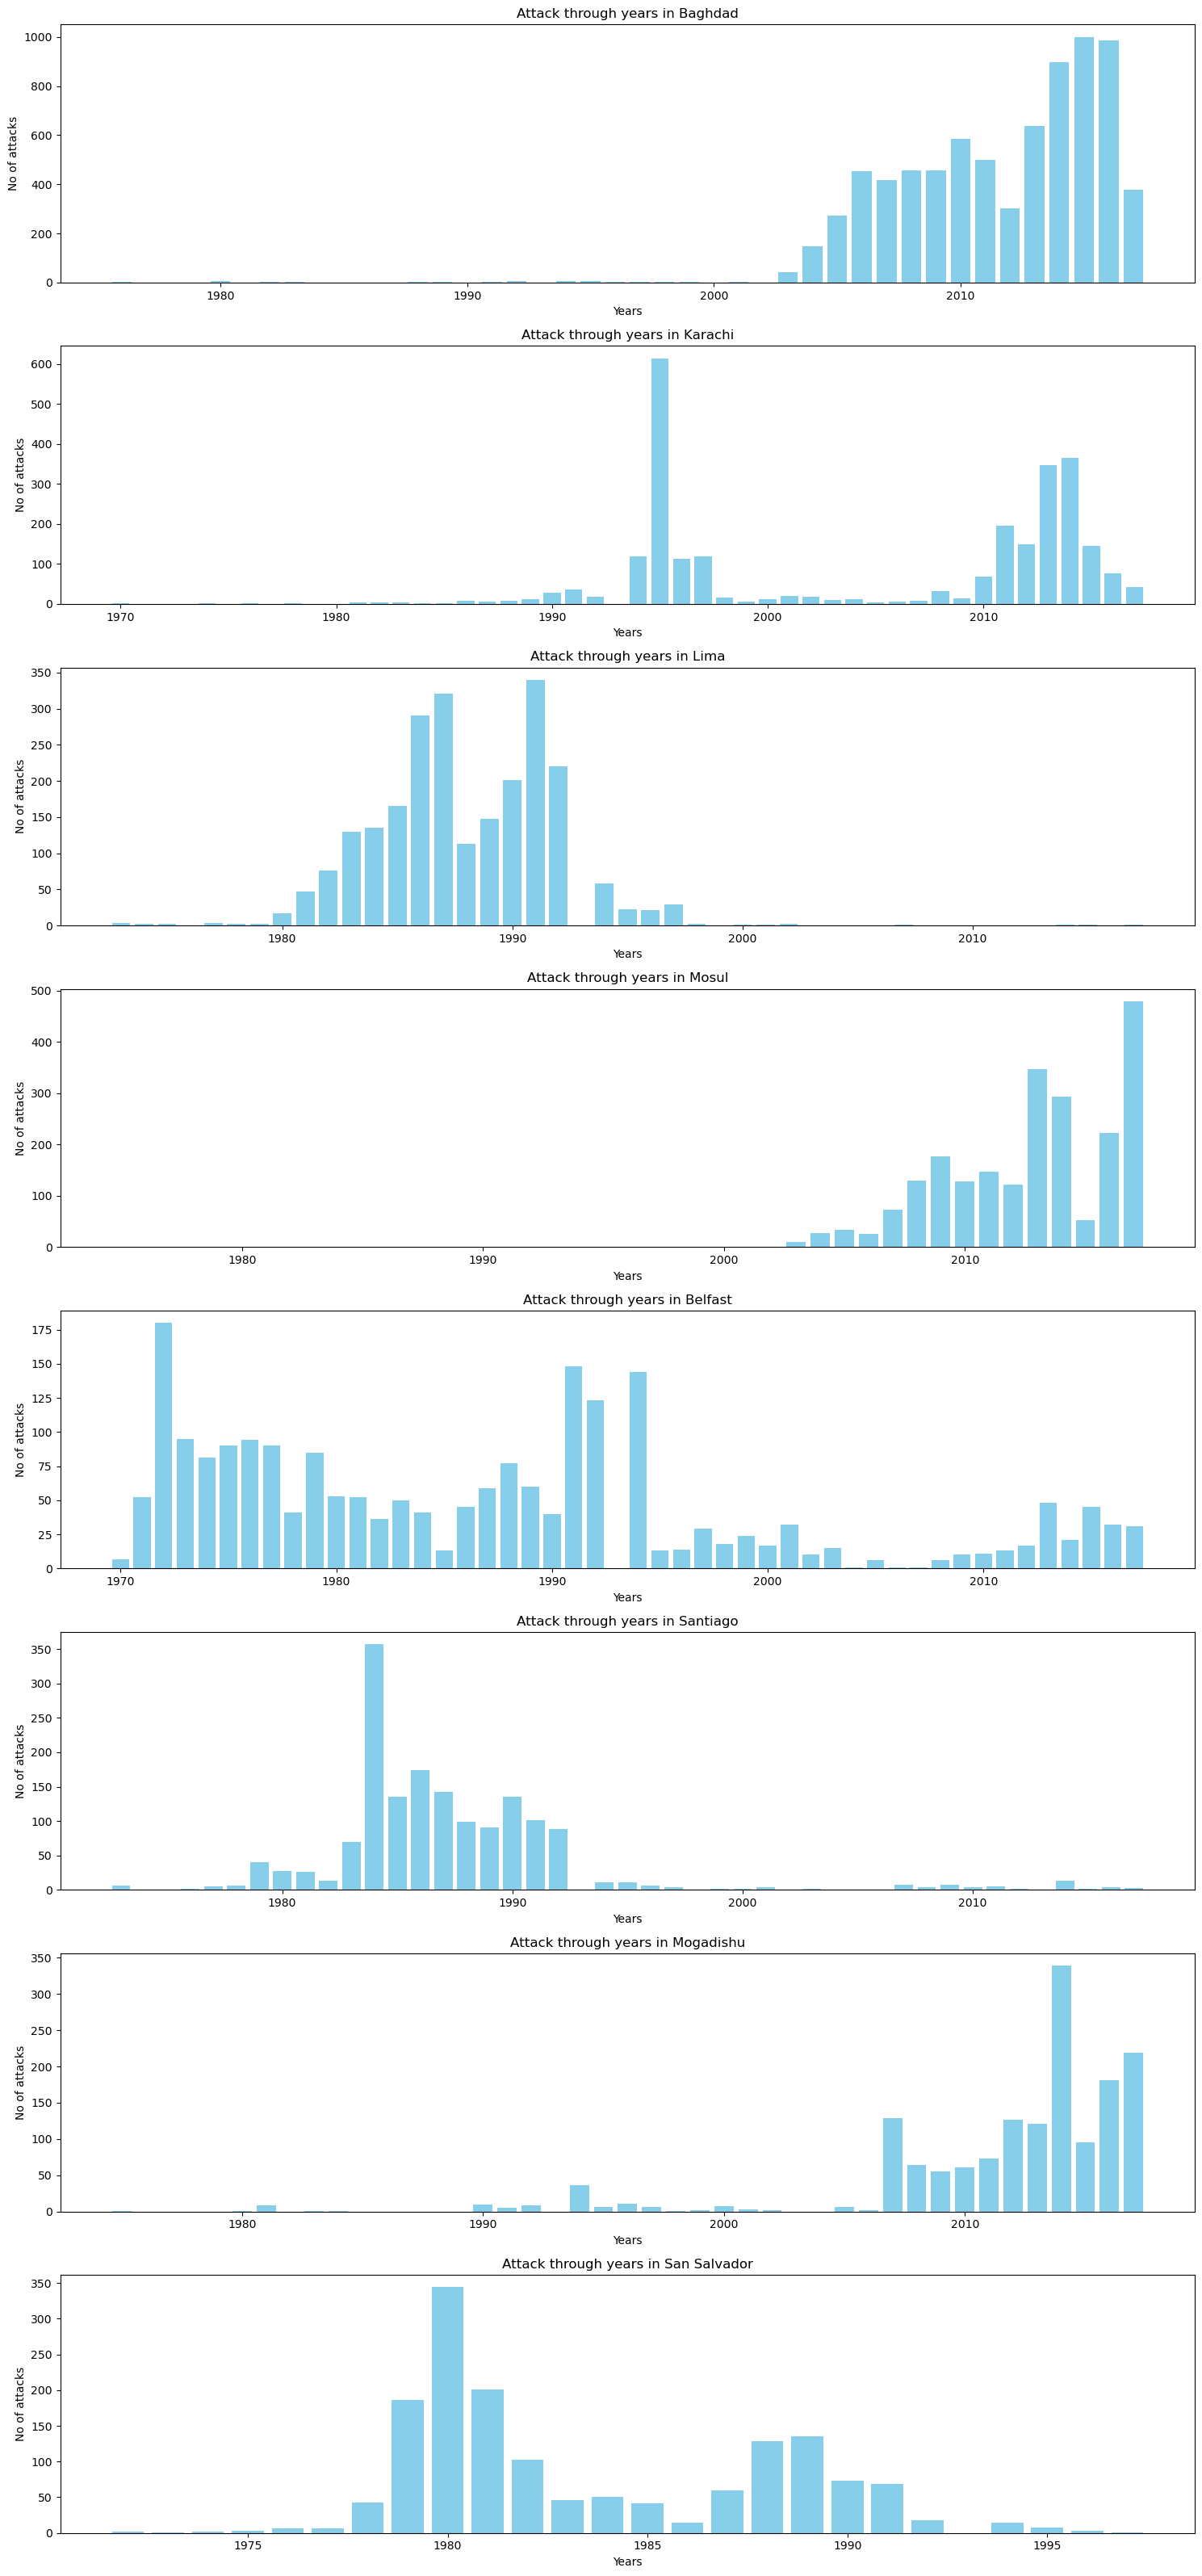

In [22]:
fig, axes = plt.subplots(nrows=len(top_n_city), figsize=(15, 4*len(top_n_city)))

# Subplot 1: barplot
for i,city in enumerate(top_n_city):
    no_of_attack_in_each_city = data[data['city']==city]['Year'].value_counts().sort_index()
    axes[i].bar(no_of_attack_in_each_city.index, no_of_attack_in_each_city.values, color='skyblue')
    axes[i].set_xlabel('Years')
    axes[i].set_ylabel('No of attacks')
    axes[i].set_title(f"Attack through years in {city}")
    


plt.tight_layout()
plt.show()

In [23]:
type_of_attack = data['AttackType'].value_counts(dropna = False)

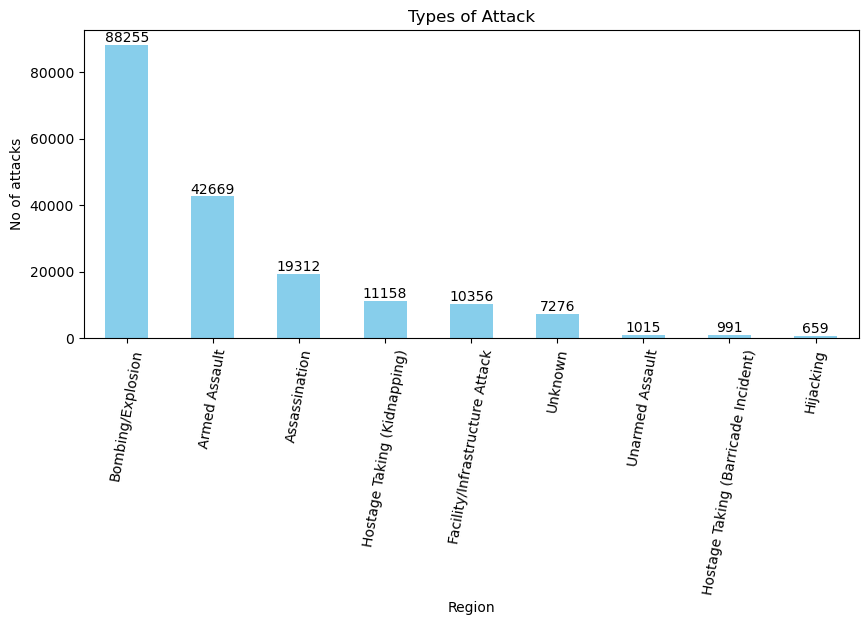

In [24]:
plt.figure(figsize=(10, 4))
bars = type_of_attack.plot(kind='bar', color='skyblue')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2.0, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.title("Types of Attack")
plt.xlabel('Region')
plt.ylabel('No of attacks')
plt.xticks(rotation=80)
plt.show()


In [25]:
data['Casualties'] = data['Killed']+data['Wounded']
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [66]:
no_of_casualties_Attack_Type = data[['AttackType','Casualties']].groupby('AttackType').sum().sort_values(by = 'Casualties',ascending = False)

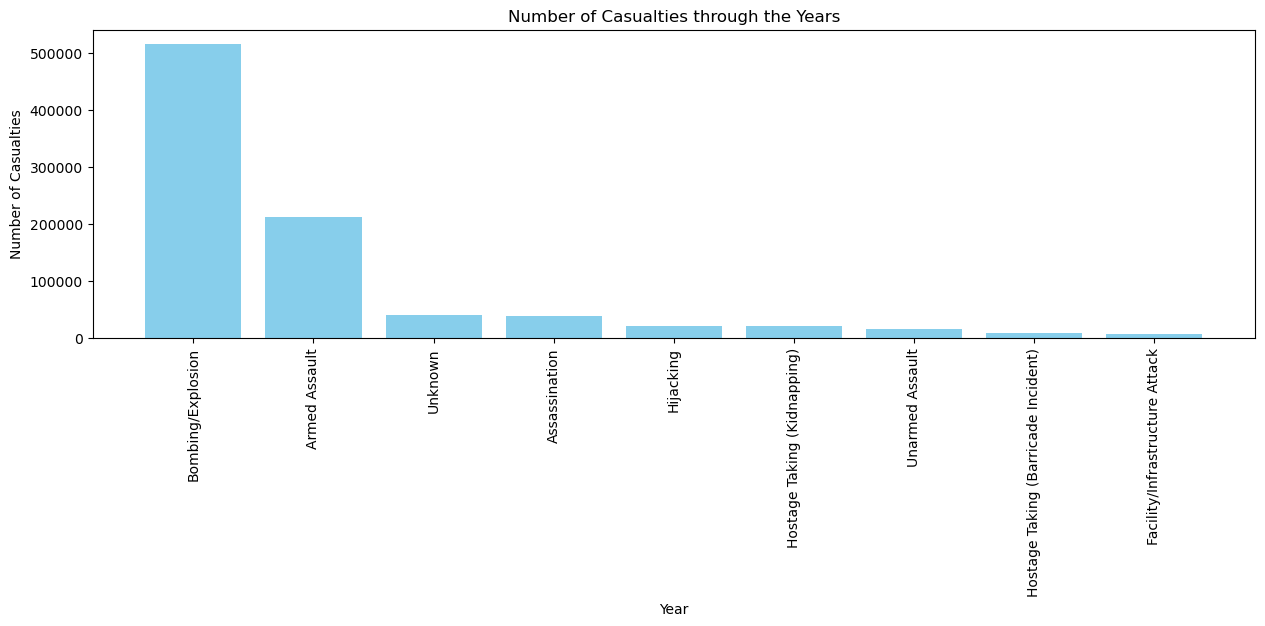

In [67]:

values = no_of_casualties_Attack_Type.values.flatten()

plt.figure(figsize=(15, 4))
plt.bar(no_of_casualties_Attack_Type.index, values, color='skyblue')
plt.title("Number of Casualties through the Years")
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Number of Casualties')
plt.show()

In [77]:
data['Target'].value_counts().head(40)

Target
Civilians                  6461
Unknown                    5918
Soldiers                   3157
Patrol                     2942
Checkpoint                 2905
Vehicle                    2785
Officers                   1787
Village                    1679
Military Unit              1533
Bus                        1335
Convoy                     1262
Unit                       1195
Market                     1194
Police Station             1190
Base                        885
Office                      875
House                       824
Checkpost                   788
Post                        739
Mosque                      694
Bank                        677
Headquarters                669
Officer                     632
Civilian                    605
Members                     605
Town                        582
High tension line tower     541
Soldier                     527
unit                        519
School                      506
Neighborhood                494
B